In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x)

3.1

In [3]:
np.median(x)

3.0

In [4]:
x.min(), x.max()

(0.9, 6.7)

In [5]:
x.var(), x.std()

(3.0700000000000007, 1.7521415467935233)

In [6]:
x.var(ddof=1), x.std(ddof=1)

(3.5085714285714293, 1.8731181032095732)

In [7]:
np.random.rand()

0.9747571754907381

In [8]:
np.random.randn()

-0.61830025223735

In [9]:
np.random.rand(5)

array([0.98656244, 0.20373245, 0.54521898, 0.28869248, 0.26919915])

In [10]:
np.random.randn(2, 4)

array([[-0.8110059 , -0.75934406, -0.88094151,  0.14886658],
       [-1.14761168, -1.63056258, -1.67087155,  0.37520159]])

In [11]:
np.random.randint(10, size=10)

array([9, 2, 0, 5, 1, 3, 4, 7, 9, 8])

In [12]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[15, 12, 19, 16, 16, 14, 11, 12, 15, 11],
       [17, 18, 11, 17, 12, 12, 10, 10, 15, 17]])

Text(0.5, 1.0, 'randint(low=1, high=10)')

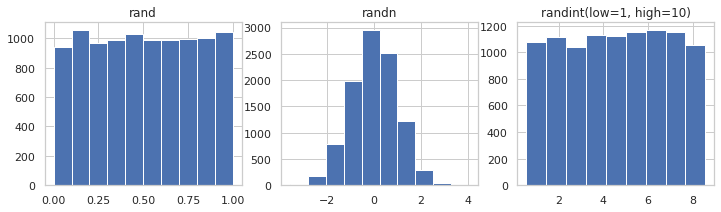

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title('rand')
axes[1].hist(np.random.randn(10000))
axes[1].set_title('randn')
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title('randint(low=1, high=10)')

In [14]:
np.random.choice(10, 5, replace=False)

array([0, 4, 7, 9, 3])

In [15]:
np.random.seed(123456789)

In [16]:
np.random.rand()

0.532833024789759

In [17]:
prng = np.random.RandomState(seed=123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [18]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [19]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [20]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [21]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [22]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

In [23]:
X = stats.norm(1, 0.5)

In [24]:
X.mean()

1.0

In [25]:
X.median()

1.0

In [26]:
X.std()

0.5

In [27]:
X.var()

0.25

In [28]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [29]:
X.stats()

(array(1.), array(0.25))

In [30]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [31]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [32]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [33]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [34]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
        
    x_min_999, x_max_999 = X.interval(0.99)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)
    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label='PDF')
        axes[0].fill_between(x95, X.pdf(95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label='PMF')
    axes[1].plot(x999, X.cdf(x999), label='CDF')
    axes[1].plot(x999, X.sf(x999), label='SF')
    axes[2].plot(x999, X.ppf(x999), label='PPF')
        
    for ax in axes:
        ax.legend()

Text(0, 0.5, 'Poisson dist.')

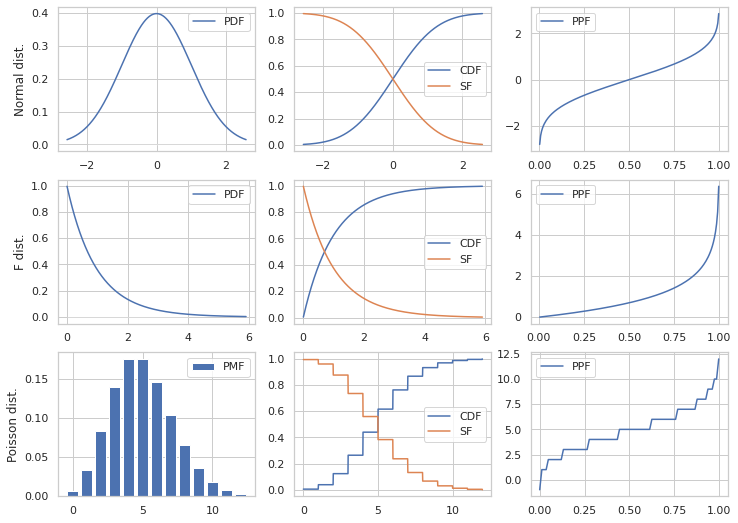

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel('Normal dist.')
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel('F dist.')
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel('Poisson dist.')

In [36]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [37]:
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [38]:
X = stats.norm(1, 0.5)

In [39]:
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

In [40]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
     """ Plot the PDF and histogram of samples of a continuous random variable"""
     if ax is None:
          fig, ax = plt.subplots(1, 1, figsize=(8, 4))

     x_lim = X.interval(.99)
     x = np.linspace(*x_lim, num=100)

     ax.plot(x, X.pdf(x), label="PDF", lw=3)
     ax.hist(X_samples, label="samples", bins=75, density=True)
     ax.set_xlim(*x_lim)
     ax.legend()

     if title:
         ax.set_title(title)
     return ax

<AxesSubplot:title={'center':'exponential dist.'}>

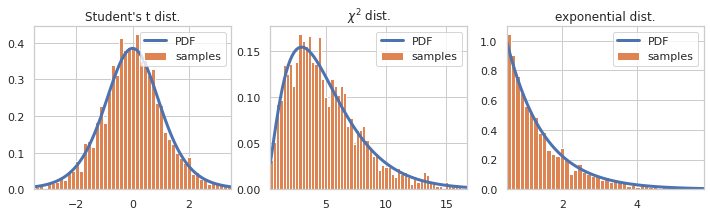

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

In [42]:
X = stats.chi2(df=5)
X_samples = X.rvs(10000)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(4.901671250241229, 0.049180062898073945, 1.0186993386747911)

In [43]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

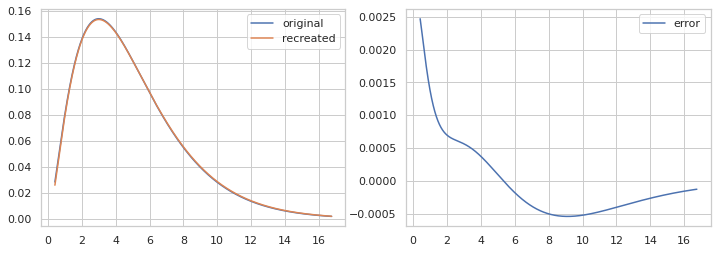

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, 10000)
axes[0].plot(x, X.pdf(x), label='original')
axes[0].plot(x, Y.pdf(x), label='recreated')
axes[0].legend()
axes[1].plot(x, X.pdf(x)-Y.pdf(x), label='error')
axes[1].legend()

In [45]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

In [46]:
z = (X_samples.mean()-mu0)/(sigma/np.sqrt(n))

In [47]:
z

-4.219275397244282

In [48]:
t = (X_samples.mean()-mu0)/(X_samples.std(ddof=1)/np.sqrt(n))

In [49]:
t

-4.085705712357725

In [50]:
stats.norm().ppf(0.025)

-1.9599639845400545

In [51]:
2*stats.norm().cdf(-abs(z))

2.4508874700933364e-05

In [52]:
2*stats.t(df=(n-1)).cdf(-abs(t))

8.934460698855796e-05

In [53]:
t, p = stats.ttest_1samp(X_samples, mu)

In [54]:
t

-0.21233379164716484

In [55]:
p

0.8322832026472525

/home/anindya/miniconda3/envs/ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


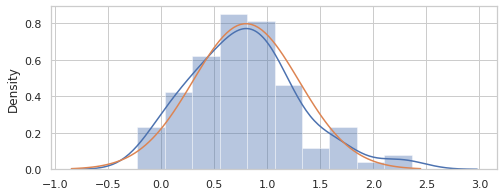

In [56]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

In [57]:
n, sigma = 50, 1.0

In [58]:
mu1, mu2 = np.random.randn(2)

In [59]:
X1 = stats.norm(mu1, sigma)

In [60]:
X1_sample = X1.rvs(n)

In [61]:
X2 = stats.norm(mu2, sigma)

In [62]:
X2_sample = X2.rvs(n)

In [63]:
t, p = stats.ttest_ind(X1_sample, X2_sample)

In [64]:
t

2.451448660161994

In [65]:
p

0.01599878670892409

In [66]:
mu1, mu2

(1.0606335436555594, 0.42137496958069126)

In [67]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)

In [68]:
kde = stats.kde.gaussian_kde(X_samples)

In [69]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

/home/anindya/miniconda3/envs/ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

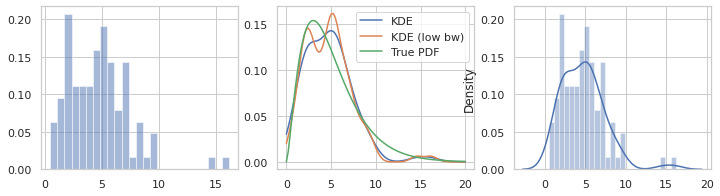

In [71]:
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(X_samples, alpha=0.5, bins=25, density=True)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

In [72]:
kde.resample(10)

array([[5.81486709, 2.11496028, 0.0636933 , 8.88512384, 4.08652443,
        1.03552311, 5.65436031, 4.02683177, 1.51647118, 6.77581276]])

In [73]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)

In [74]:
kde_cdf = np.vectorize(_kde_cdf)

In [75]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]

In [76]:
kde_ppf = np.vectorize(_kde_ppf)

In [77]:
kde_ppf([0.05, 0.95])

array([0.67529427, 9.31277976])